In [39]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [44]:
# Load your startup dataset (team 6)
data = pd.read_csv('startup_data.csv')


In [45]:
data

,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,Unnamed: 48
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [46]:
data.isnull().sum()

state_code                   0
latitude                     0
longitude                    0
zip_code                     0
id                           0
city                         0
Unnamed: 6                   0
name                        29
labels                       0
founded_at                   0
closed_at                    0
first_funding_at            35
last_funding_at              0
age_first_funding_year       0
age_last_funding_year        0
age_first_milestone_year     0
age_last_milestone_year      7
relationships                7
funding_rounds               0
funding_total_usd            0
milestones                   0
state_code.1                 0
is_CA                        0
is_NY                        0
is_MA                        0
is_TX                        0
is_otherstate                0
category_code                0
is_software                  0
is_web                       0
is_mobile                    0
is_enterprise                0
is_adver

In [47]:
data = data.drop(columns=['age_first_milestone_year', 'age_last_milestone_year','Unnamed: 6','closed_at'])


In [48]:
data.isnull().sum()

state_code                 0
latitude                   0
longitude                  0
zip_code                   0
id                         0
city                       0
name                      29
labels                     0
founded_at                 0
first_funding_at          35
last_funding_at            0
age_first_funding_year     0
age_last_funding_year      0
relationships              7
funding_rounds             0
funding_total_usd          0
milestones                 0
state_code.1               0
is_CA                      0
is_NY                      0
is_MA                      0
is_TX                      0
is_otherstate              0
category_code              0
is_software                0
is_web                     0
is_mobile                  0
is_enterprise              0
is_advertising             0
is_gamesvideo              0
is_ecommerce               0
is_biotech                 0
is_consulting              0
is_othercategory           0
object_id     

In [49]:
# Generate synthetic data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)  # Two features for simplicity
y = np.random.choice([0, 1], 100)  # Binary target variable

In [50]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [51]:
# Assuming your DataFrame is named 'data'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['latitude', 'city', 'name', 'labels', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'is_CA', 'is_software',
       'has_VC', 'Unnamed: 48'],
      dtype='object')


In [52]:
column_to_keep = 'status'

In [53]:
# Select columns with data type 'object' (strings)
string_columns = data.select_dtypes(include=['object'])


In [54]:
# List of columns to drop (excluding the one to keep)
columns_to_drop = [col for col in string_columns.columns if col != column_to_keep]


In [55]:
# Drop the selected string columns (excluding the one to keep)
data = data.drop(columns_to_drop, axis=1)


In [56]:
data

,state_code,longitude,zip_code,id,founded_at,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,object_id,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,42.358880,-71.056820,92101,1,2.2493,6.7041,3,3,375000,...,0,1,0,1,0,0,0,0,1.0000,0
1,204,37.238916,-121.973718,95032,1,5.1260,7.0055,9,4,40100000,...,0,0,1,0,0,1,1,1,4.7500,1
2,1001,32.901049,-117.192656,92121,1,1.0329,2.2055,5,1,2600000,...,0,0,0,0,1,0,0,0,4.0000,1
3,738,37.320309,-122.050040,95014,1,3.1315,6.0027,5,3,40000000,...,0,0,0,0,0,1,1,1,3.3333,1
4,1002,37.779281,-122.419236,94105,0,0.0000,0.0384,2,2,1300000,...,0,0,1,1,0,0,0,0,1.0000,1
5,379,37.406914,-122.090370,94043,0,4.5452,5.0027,3,1,7500000,...,0,1,0,0,0,1,0,0,3.0000,1
6,195,37.391559,-122.070264,94041,1,1.7205,6.6082,6,3,26000000,...,0,0,1,0,1,1,0,0,1.6667,1
7,875,38.057107,-122.513742,94901,1,1.6466,7.3616,25,3,34100000,...,0,1,0,0,1,1,0,1,3.5000,1
8,16,42.712207,-73.203599,1267,1,3.5863,9.9945,13,3,9650000,...,0,0,1,0,1,0,0,1,4.0000,1
9,846,37.427235,-122.145783,94306,1,1.6712,6.1151,14,3,5750000,...,0,0,1,1,1,0,0,0,1.0000,1


In [57]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Standardize features (not necessary for this synthetic data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000)
}

In [61]:
# Train and test each classifier, and print its accuracy for both the training and testing data
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'{clf_name}:')
    print(f'Training Accuracy: {train_accuracy:.2f}')
    print(f'Testing Accuracy: {test_accuracy:.2f}')
    print()

Logistic Regression:
Training Accuracy: 0.55
Testing Accuracy: 0.50

Gradient Boosting:
Training Accuracy: 1.00
Testing Accuracy: 0.45

Random Forest:


Training Accuracy: 1.00
Testing Accuracy: 0.40

Decision Tree:
Training Accuracy: 1.00
Testing Accuracy: 0.30

MLP Neural Network:
Training Accuracy: 0.59
Testing Accuracy: 0.35



In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
# Initialize and train each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000)
}

In [64]:
# Assuming 'X_train' and 'y_train' contain your training data
for model_name, model in models.items():
    model.fit(X_train, y_train)


In [65]:
# Assuming 'X_test' is your test data
y_true = y_test  # Replace 'y_true' with your actual true labels


In [66]:
# Calculate AUC for each model
auc_values = {model_name: roc_auc_score(y_true, model.predict_proba(X_test)[:, 1]) for model_name, model in models.items()}


In [67]:
# Print AUC values for each model
for model_name, auc in auc_values.items():
    print(f'{model_name} - AUC: {auc:.2f}')

Logistic Regression - AUC: 0.70
Gradient Boosting - AUC: 0.45
Random Forest - AUC: 0.39
Decision Tree - AUC: 0.27
MLP Neural Network - AUC: 0.38


In [68]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


In [69]:
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
# 4. Evaluate Models
model_results = {}
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

In [71]:
# 5. Compare Model Performance
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"Classification Report:\n{results['Classification Report']}")
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         6
           1       1.00      0.29      0.44        14

    accuracy                           0.50        20
   macro avg       0.69      0.64      0.49        20
weighted avg       0.81      0.50      0.47        20

Model: Gradient Boosting
Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.50      0.35         6
           1       0.67      0.43      0.52        14

    accuracy                           0.45        20
   macro avg       0.47      0.46      0.44        20
weighted avg       0.55      0.45      0.47        20

Model: MLP Neural Network
Accuracy: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.67      0.36         6
           1       0.50      0.14      0.22    

In [72]:
import matplotlib.pyplot as plt

In [73]:
model_names = ['Logistic Regression', 'Gradient Boosting', 'MLP Neural Network', 'Random Forest', 'Decision Tree']
model_accuracies = [0.5, 0.45, 0.3, 0.45, 0.3]  # Accuracy values corresponding to each model


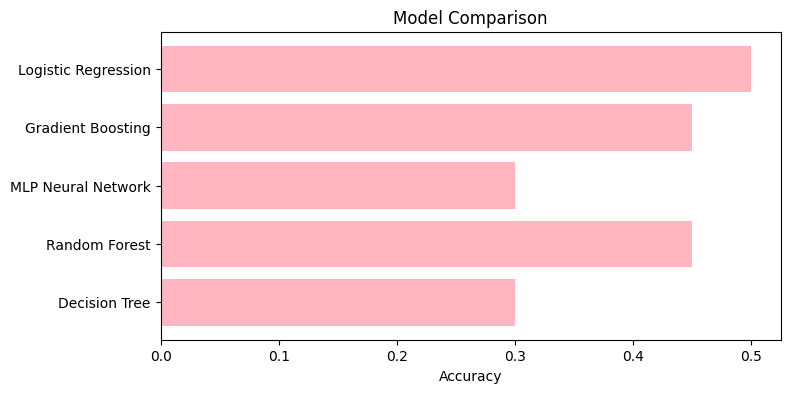

In [74]:
plt.figure(figsize=(8, 4))
plt.barh(model_names, model_accuracies, color='lightpink')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.gca().invert_yaxis()
plt.show()

In [75]:
import seaborn as sns

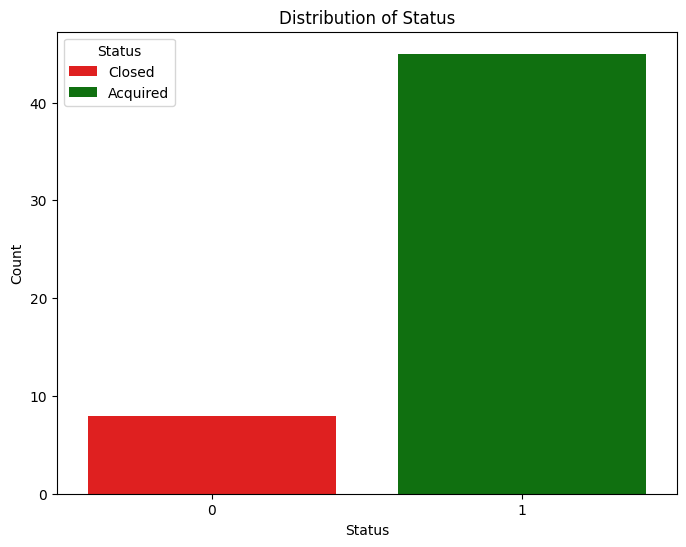

In [76]:
# Define a custom color palette
custom_palette = {'Closed': 'red', 'Acquired': 'green'}

# Assuming 'df' is your DataFrame and 'status' is the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='status', hue=data['status'].map({0: 'Closed', 1: 'Acquired'}), dodge=False, 
              palette=custom_palette)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.legend(title='Status', labels=['Closed', 'Acquired'])
plt.show()